In [18]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mp

In [5]:
df=pd.read_csv('https://data.cityofnewyork.us/resource/erm2-nwe9.csv')
df.head(7)

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
0,46198038,2020-05-15T02:01:30.000,NaN,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11206.0,811 FLUSHING AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.701169,-73.940049,"\n, \n(40.70116923498277, -73.94004889209619)"
1,46199075,2020-05-15T02:01:09.000,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10312.0,120 SHOTWELL AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.553805,-74.181537,"\n, \n(40.55380540206159, -74.18153672909946)"
2,46202091,2020-05-15T02:00:53.000,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11212.0,81 JUNIUS STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.673003,-73.903826,"\n, \n(40.673002516118665, -73.90382600006895)"
3,46194846,2020-05-15T02:00:09.000,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11230.0,1887 CONEY ISLAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.611306,-73.962615,"\n, \n(40.611306415360204, -73.96261476339647)"
4,46202129,2020-05-15T01:58:47.000,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,NaN,10452.0,EAST 174 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.845061,-73.913087,"\n, \n(40.84506144312155, -73.91308651834815)"
5,46201020,2020-05-15T01:58:40.000,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11204.0,1729 67 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.618696,-73.993044,"\n, \n(40.61869577853208, -73.99304442374901)"
6,46198045,2020-05-15T01:58:30.000,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11212.0,30 GLENMORE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.671149,-73.909708,"\n, \n(40.671149068671546, -73.90970825480059)"


In [6]:
df_top_complaint = df[df['complaint_type'] == 'Noise - Residential'].reset_index(drop = True)
df_top_complaint.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
0,46198038,2020-05-15T02:01:30.000,NaN,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11206.0,811 FLUSHING AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.701169,-73.940049,"\n, \n(40.70116923498277, -73.94004889209619)"
1,46195997,2020-05-15T01:58:29.000,NaN,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10456.0,731 EAST 161 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821473,-73.905284,"\n, \n(40.82147272138605, -73.90528426267159)"
2,46195189,2020-05-15T01:58:03.000,NaN,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11420.0,130-41 122 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.673378,-73.817056,"\n, \n(40.6733775989386, -73.81705630146443)"
3,46202332,2020-05-15T01:57:18.000,2020-05-15T01:58:32.000,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11420.0,149-39 114 PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.668789,-73.826268,"\n, \n(40.66878887952478, -73.8262682653491)"
4,46195221,2020-05-15T01:56:00.000,NaN,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10467.0,765 EAST 214 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.879228,-73.862607,"\n, \n(40.87922781323706, -73.86260703747318)"


In [7]:
# To understand the distribution of top complaint type across different boroughs

df_top_complaint['borough'].unique()


array(['BROOKLYN', 'BRONX', 'QUEENS', 'MANHATTAN', 'STATEN ISLAND'],
      dtype=object)

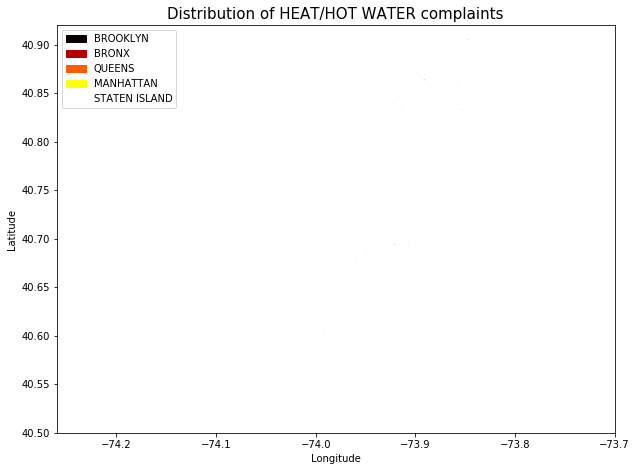

In [20]:
# adjust settings
plt.figure(figsize=(10,7.5))

# list of unique values in borough column
list_value_borough = list(df_top_complaint['borough'].unique())
patches = []

# setting color map
color_map = plt.cm.hot(np.linspace(0,1, len(list_value_borough)))
                           
for index, value in enumerate(list_value_borough):
    borough_top_complaint = df_top_complaint[df_top_complaint['borough']== value]
    plt.scatter(borough_top_complaint.longitude, borough_top_complaint.latitude, s=1, 
                alpha=0.02,color= color_map[index], marker ='.')
    patches.append(mpatches.Patch(label=value, color=color_map[index]))

# create legend
plt.legend(patches,
           list_value_borough, 
           loc='upper left', prop={'size':10})

# adjust more settings
plt.title('Distribution of HEAT/HOT WATER complaints', size=15)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=10)
plt.ylabel('Latitude',size=10)
plt.show()

In [21]:
#To make sure which borough is severely affected with maximum number of top complaint registered
df_top_complaint['borough'].value_counts() 

BRONX            117
BROOKLYN         106
MANHATTAN         88
QUEENS            54
STATEN ISLAND     11
Name: borough, dtype: int64

In [ ]:
"""From the results above, we can say that "Bronx" is most severely affected borough by the top complaint type"""

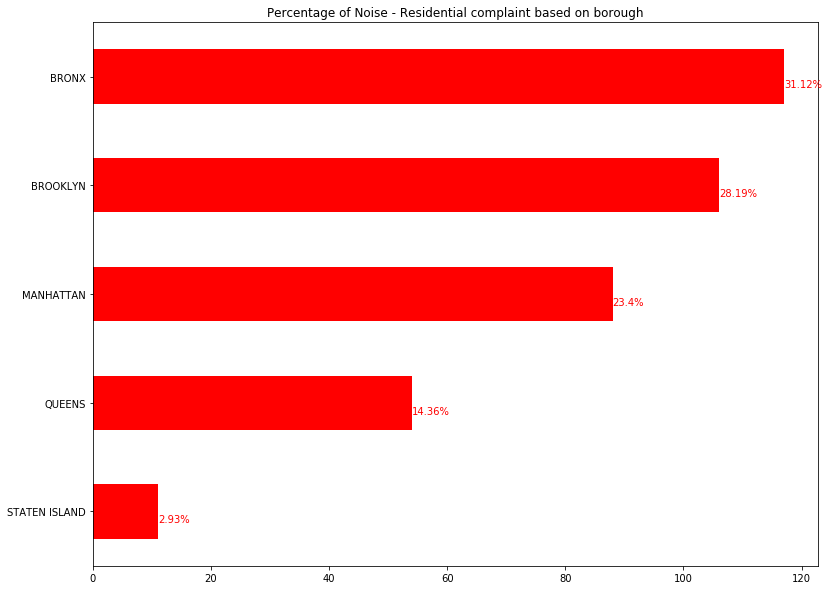

In [35]:
# Implementing bar chart to visualize data graphically and support our conclusion

borough_series = df_top_complaint['borough'].value_counts()
borough_series.sort_values(ascending = True, inplace =True)
total_borough = borough_series.sum()

# Create barh plot

borough_series.plot(kind = 'barh', figsize = (13, 10), color ='red')

# Calculating percentage for total number of complaints per type
for index, value in enumerate(borough_series):
    label =  '{}%'.format(round((value/total_borough)*100, 2)) 
    plt.annotate(label, xy=(value, index-0.1), color='red')
    
    
plt.title('Percentage of Noise - Residential complaint based on borough')
plt.show()

In [36]:
# To make sure which street is severely affected with maximum number of top complaint registered
df_top_complaint['street_name'].value_counts().head(10)

BLEECKER STREET     8
EAST  243 STREET    7
EAST  194 STREET    6
GRAND CONCOURSE     5
OLMSTEAD AVENUE     4
EDGECOMBE AVENUE    4
BERGEN STREET       4
WARING AVENUE       3
WEST  197 STREET    3
COLUMBUS AVENUE     3
Name: street_name, dtype: int64

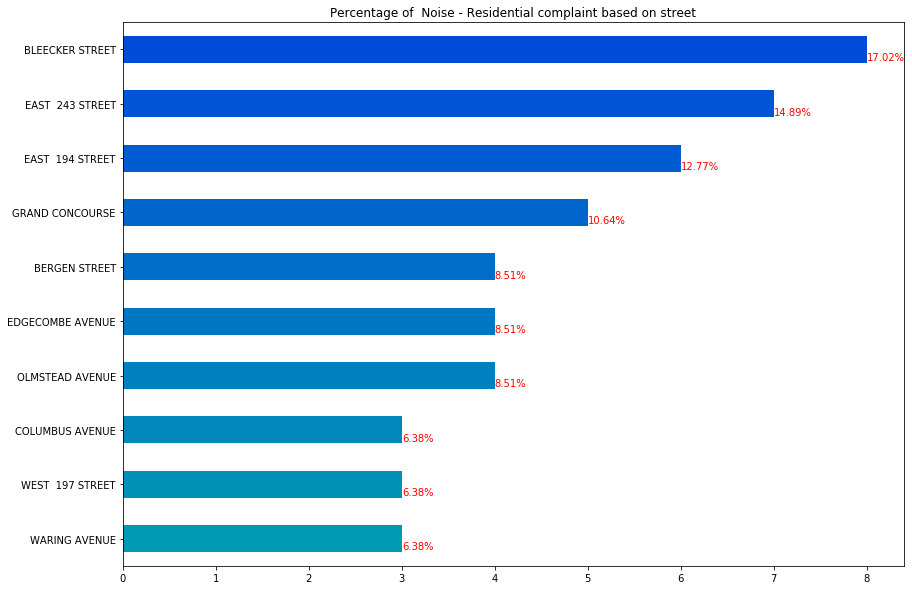

In [46]:
street_series = df_top_complaint['street_name'].value_counts().head(10)
street_series.sort_values(ascending = True, inplace =True)
total_street = street_series.sum()

# Create barh plot
color_scheme = plt.cm.winter(np.linspace(0.6, 0.3, 10))
street_series.plot(kind = 'barh', figsize = (14, 10), color = color_scheme)

# Set text label to show the percentage of each borough
for index, value in enumerate(street_series):
    label =  '{}%'.format(round((value/total_street)*100, 2)) 
    plt.annotate(label, xy=(value, index-0.2), color='red')

    
plt.title('Percentage of  Noise - Residential complaint based on street')
plt.show()

In [ ]:
# so, we can conclude that "BLEEKER STREET" is most severely affected street by the top complaint

In [ ]:
"""Similarly,to make sure which zip code is severely affected with maximum number of top complaint registered"""

In [47]:
df_top_complaint['incident_zip'].value_counts().head(10)

10458.0    15
11221.0    14
10457.0    10
10470.0     9
11216.0     9
10469.0     9
10040.0     9
10473.0     8
11226.0     8
10025.0     8
Name: incident_zip, dtype: int64

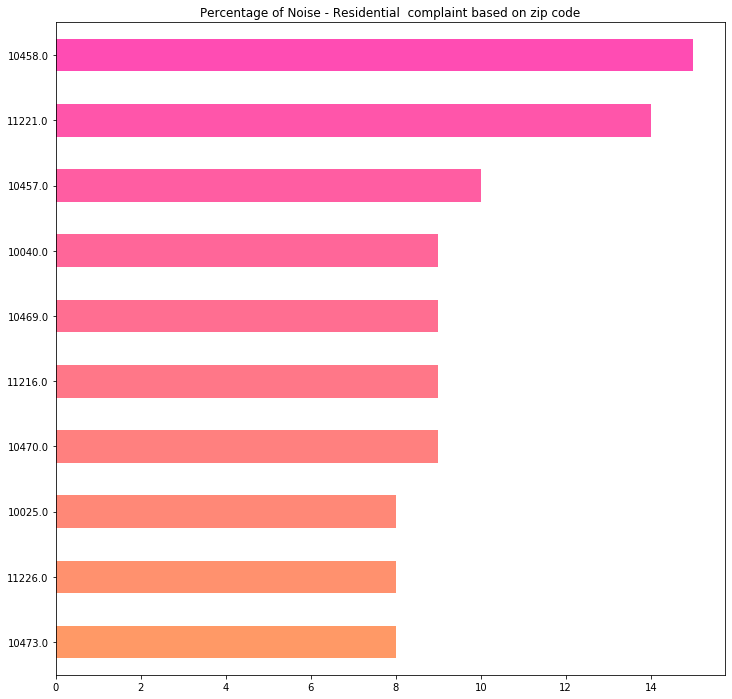

In [49]:
#Implementing bar chart to visualize data graphically and support our conclusion

zip_series = df_top_complaint['incident_zip'].value_counts().head(10)
zip_series.sort_values(ascending = True, inplace =True)
total_zip = zip_series.sum()
color_scheme = plt.cm.spring(np.linspace(0.6, 0.3, 10))

# Create barh plot

zip_series.plot(kind = 'barh', figsize = (12, 12), color = color_scheme)
    
plt.title('Percentage of Noise - Residential  complaint based on zip code')
plt.show()

In [ ]:
"""From the results above, we can see that "BLEEKER STREET" street is located in Bronx and zipcode 10458.0 is located in Brookly
n which are our top two boroughs having highest number of Noise - Residential  complaints. Hence the Department of Housing 
Preservation and Development of New York City should focus on Bronx and Brooklyn boroughs first, respectively."""